In [1]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [2]:
r12 = 1.0 #initial spacing
m1 = 1.0
m2 = 0.1
G = 1

In [3]:
P = np.sqrt(4*np.pi**2/(G*(m1+m2))  * r12**(3))

In [4]:
n = 2*np.pi/P
pi1 = m1/(m1+m2)
pi2 = m2/(m1+m2)
x1 = -pi2*r12
x2 = pi1*r12

In [12]:
l=1.5
xs = np.linspace(-l,l,1000)
ys = np.linspace(-l,l,1000)

In [13]:
X,Y = np.meshgrid(xs,ys)

In [14]:
R = np.sqrt(X**2 + Y**2)
R1 = np.sqrt((X-x1)**2 + Y**2)
R2 = np.sqrt((X-x2)**2 + Y**2)
U = ((n*R)**2) / 2  + (m1/R1 + m2/R2) 

In [15]:
from matplotlib import cm

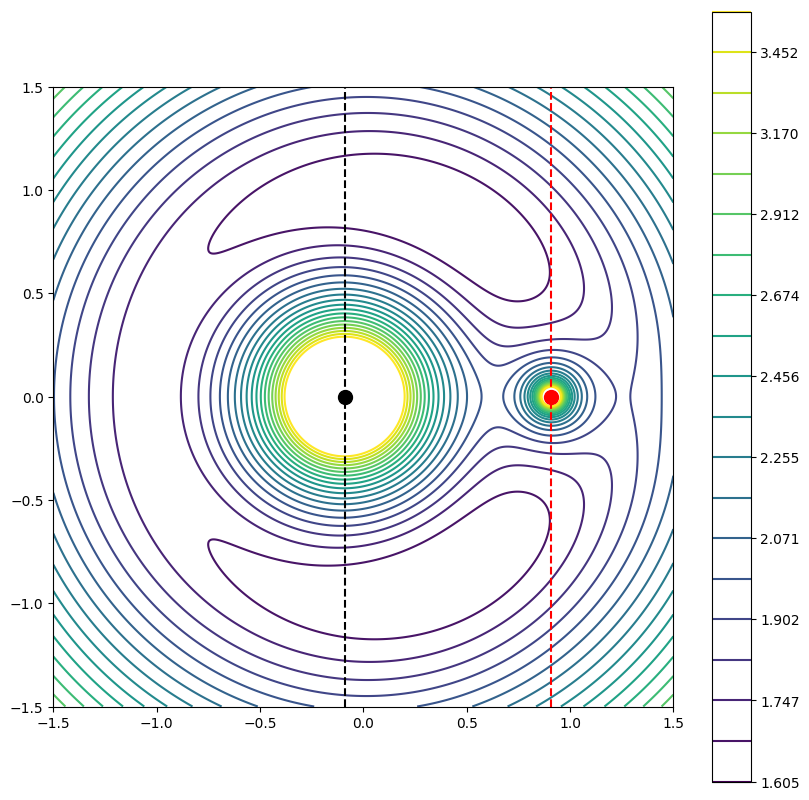

In [16]:
fig = plt.figure(figsize=(10,10))
umin,umax = np.log10(np.min(U)),0.2*np.log10(np.max(U))
level= np.logspace(umin,umax,20)
loglevels = np.log10(level)
colors = cm.viridis((loglevels - np.min(loglevels)) / (np.max(loglevels) - np.min(loglevels)))


sc = plt.contour(X,Y,U,levels=level,zorder=-1,colors = colors)
plt.scatter(x1,0,c='k',s=100)
plt.scatter(x2,0,c='r',s=100)
plt.xlim(-l,l)
plt.ylim(-l,l)
plt.axvline(x1,c='k',ls='--')
plt.axvline(x2,c='r',ls='--')
plt.colorbar(sc)
plt.axis('square')
plt.savefig('jacobi_contours.png',dpi=600)